In [6]:
### This cell imports the necessary modules and sets a few plotting parameters for display

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)  

### Read in the data

data = pd.read_csv('train.csv')  

### The .head() function shows the first few lines of data for perspecitve
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


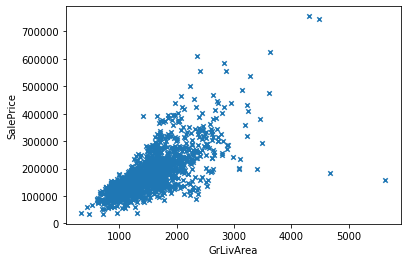

In [21]:

data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

In [8]:
import statistics 

def standardize( num_list):
    my_array = np.array(num_list)
    std= np.std(my_array,axis=0, ddof=0).tolist()
    mean= np.mean(my_array).tolist()
    norm = [(float(i)-mean)/std for i in num_list]
    return norm


In [9]:
num_list = [1,2,3,3,4,4,5,5,5,5,5]
nl_std = standardize(num_list)
print(np.round(nl_std,2))

[-2.11 -1.36 -0.61 -0.61  0.14  0.14  0.88  0.88  0.88  0.88  0.88]


In [10]:
def preprocess_for_regularization(data,y_column_name, x_column_name):
    y=data[y_column_name].tolist()
    y_mean= np.mean(y).tolist()
    norm_y = [(float(i)-y_mean) for i in y]
    
    a= x_column_name[0]
    b= x_column_name[1]
    a=data[a].tolist()
    b=data[b].tolist()
    std_a= np.std(a,axis=0, ddof=0)
    mean_a= np.mean(a)
    norm_a = [(float(i)-mean_a)/std_a for i in a]
    std_b= np.std(b,axis=0, ddof=0)
    mean_b= np.mean(b)
    norm_b = [(float(i)-mean_b)/std_b for i in b]
    dict={"GrLivArea":norm_a,'YearBuilt':norm_b,"sales":norm_y}
    df = pd.DataFrame(dict) 
    return df
        

In [11]:
preprocess_for_regularization(data,'SalePrice', ['GrLivArea','YearBuilt'])

,GrLivArea,YearBuilt,sales
0,0.370333,1.050994,27578.80411
1,-0.482512,0.156734,578.80411
2,0.515013,0.984752,42578.80411
3,0.383659,-1.863632,-40921.19589
4,1.299326,0.951632,69078.80411
...,...,...,...
1455,0.250402,0.918511,-5921.19589
1456,1.061367,0.222975,29078.80411
1457,1.569647,-1.002492,85578.80411
1458,-0.832788,-0.704406,-38796.19589


In [12]:
### GRADED
### Code a function called "preprocess_for_regularization" 
### ACCEPT the DataFrame, a y input and an x input input
### RETURN preprocess our data by performing:
### -mean subtraction from $y$,
### -dimension standardization for $x$

### YOUR ANSWER BELOW
def preprocess_for_regularization(data,y_column_name, x_column_name):
    data_cp = data.copy()
    to_return = pd.DataFrame(columns = [y_column_name] + x_column_name)
    mean_y = np.mean(data_cp[y_column_name])
    to_return[y_column_name] = [x - mean_y for x in data_cp[y_column_name]]
    for item in x_column_name:
        mean_x = np.mean(data_cp[item])
        std_x = np.std(data_cp[item])
        to_return[item] = data_cp[item].apply(lambda x: (x - mean_x)/std_x)
        
    
    
    
    """
    Perform mean subtraction and dimension standardization on data
        
    Positional argument:
        data -- a pandas dataframe of the data to pre-process
        y_column_name -- the name (string) of the column that contains
            the target of the training data.
        x_column_names -- a *list* of the names of columns that contain the
            observations to be standardized
        
    Returns:
        Return a DataFrame consisting only of the columns included
        in `y_column_name` and `x_column_names`.
        Where the y_column has been mean-centered, and the
        x_columns have been mean-centered/standardized.
        
        
    Example:
        data = pd.read_csv(tr_path).head()
        prepro_data = preprocess_for_regularization(data,'SalePrice', ['GrLivArea','YearBuilt'])
        
        print(prepro_data) #-->
                   GrLivArea  YearBuilt  SalePrice
                0  -0.082772   0.716753     7800.0
                1  -1.590161  -0.089594   -19200.0
                2   0.172946   0.657024    22800.0
                3  -0.059219  -1.911342   -60700.0
                4   1.559205   0.627159    49300.0
    
    NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"
    
    If your answer does not match the example answer,
    check the default degrees of freedom in your standard deviation function.
    """
    return to_return

###
### YOUR CODE HERE
###


In [13]:
prepro_data = preprocess_for_regularization(data,'SalePrice', ['GrLivArea','YearBuilt'])
prepro_data

,SalePrice,GrLivArea,YearBuilt
0,27578.80411,0.370333,1.050994
1,578.80411,-0.482512,0.156734
2,42578.80411,0.515013,0.984752
3,-40921.19589,0.383659,-1.863632
4,69078.80411,1.299326,0.951632
...,...,...,...
1455,-5921.19589,0.250402,0.918511
1456,29078.80411,1.061367,0.222975
1457,85578.80411,1.569647,-1.002492
1458,-38796.19589,-0.832788,-0.704406


# Next, you'll implement the equation for ridge regression using the closed form equation:

wRR=(λ+XTX)−1XTy
wRR=(λ+XTX)−1XTy
 
The function will be very similar to the function you wrote for Least Squares Regression with a slightly different matrix to invert.

NB: Many numpy matrix functions will be useful. e.g. np.matmul, np.linalg.inv, np.ones, np.transpose, and np.identity.

The main change from Least Squares Regression is that  λλ  is a parameter we must set. This is different from the  ww  parameters that we calculate from either closed form or approximation algorithms.

We will address tuning parameters such as  λλ  in the next section.

In [14]:
### GRADED
### Code a function called "ridge_regression_weights"
### ACCEPT three inputs:
### Two matricies corresponding to the x inputs and y target
### and a number (int or float) for the lambda parameter

### RETURN a numpy array of regression weights

### The following must be accomplished:

### Ensure the number of rows of each the X matrix is greater than the number of columns.
### ### If not, transpose the matrix.
### Ultimately, the y input will have length n.
### Thus the x input should be in the shape n-by-p

### *Prepend* an n-by-1 column of ones to the input_x matrix

### Use the above equation to calculate the least squares weights.
### This will involve creating the lambda matrix---
### ### a p+1-by-p+1 matrix with the "lambda_param" on the diagonal
### ### p+1-by-p+1 because of the prepended "ones".

### NB: Pay close attention to the expected format of the returned
### weights. It is different / simplified from Assignment 1.

### YOUR ANSWER BELOW

def ridge_regression_weights(input_x, output_y, lambda_param):
    if input_x.shape[0] < input_x.shape[1]:
        input_x = input_x.T
        
    output_y=output_y.T
        
    ones = np.ones((len(output_y), 1), dtype=int)
    
    augmented_x = np.concatenate((ones, input_x), axis=1)
    
    lambda_factor=(np.linalg.inv(np.matmul(np.transpose(augmented_x), augmented_x)+lambda_param))
    left_multiplier=np.matmul(lambda_factor,np.transpose(augmented_x))
    
    weights = np.matmul(left_multiplier, output_y) 
    
    return weights  
    
    """Calculate ridge regression least squares weights.
    
    Positional arguments:
        input_x -- 2-d matrix of input data
        output_y -- 1-d numpy array of target values
        lambda_param -- lambda parameter that controls how heavily
            to penalize large weight values
        
    Example:
        training_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
        training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001,
                               1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
        lambda_param = 10
        
        rrw = ridge_regression_weights(training_x, training_y, lambda_param)
        
        print(rrw) #--> np.array([-576.67947107,   77.45913349,   31.50189177])
        print(rrw[2]) #--> 31.50189177
        
    Assumptions:
        -- output_y is a vector whose length is the same as the
        number of observations in input_x
        -- lambda_param has a value greater than 0
    """
    
    #weights = np.array([])
    #return weights

###
### YOUR CODE HERE
###

In [15]:
output_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
input_x = np.array([[1710, 1262, 1786, 
                    1717, 2198, 1362, 
                    1694, 2090, 1774, 1077], 
                    [2003, 1976, 2001, 
                    1915, 2000, 1993, 
                    2004, 1973, 1931, 
                    1939]])
lambda_param = 10
rrw = ridge_regression_weights(input_x, output_y, lambda_param)
print (rrw)

[-685.97570814   77.45958603   31.55703313]


# Selecting the  λ  parameter
For our final function before looking at the sklearn implementation of ridge regression, we will create a hyper-parameter tuning algorithm.

In ridge regression, we must pick a value for  λ . We have some intuition about  λλ  from the equations that define it: small values tend to emulate the results from Least Squares, while large values will reduce the dimensionality of the problem. But the choice of  λ  can be motivated with a more precise quantitative treatment.

Eventually, we will look to choose the value of  λ  that minimizes validation error, which we will determine using  kk -fold cross-validation.

For this example here, we will solve a simpler problem: Find a value that minimizes the list returned by the function

In [16]:
### Example of hiden function below:

### `hidden` takes a single number as a parameter (int or float) and returns a list of 1000 numbers
### the input must be between 0 and 50 exclusive

def hidden(hp):
    if (hp<=0) or (hp >= 50):
        print("input out of bounds")
    
    nums = np.logspace(0,5,num = 1000)
    vals = nums** 43.123985172351235134687934
    
    user_vals = nums** hp
    
    return vals-user_vals

In [17]:
### GRADED
### Code a function called "minimize"
### ACCEPT one input: a function.

### That function will be similar to `hidden` created above and available for your exploration.
### Like 'hidden', the passed function will take a single argument, a number between 0 and 50 exclusive 
### and then, the function will return a numpy array of 1000 numbers.

### RETURN the value that makes the mean of the array returned by 'passed_func' as close to 0 as possible

### Note, you will almost certainly NOT be able to find the number that makes the mean exactly 0
### YOUR ANSWER BELOW

def minimize( passed_func):
    """
    Find the numeric value that makes the mean of the
    output array returned from 'passed_func' as close to 0 as possible.
    
    Positional Argument:
        passed_func -- a function that takes a single number (between 0 and 50 exclusive)
            as input, and returns a list of 1000 floats.
        
    Example:
        passed_func = hidden
        min_hidden = minimize(passed_func)
        print(round(min_hidden,4))
        #--> 43.1204 (answers will vary slightly, must be close to 43.123985172351)
    
    """
    # Create values to test
    test_vals = np.linspace(.1,49,1000)
    
    # Find mean of returned array from function
    ret_vals = [abs(np.mean(passed_func(x))) for x in test_vals]
    
    # Find smallest mean
    min_mean = min(ret_vals)
    
    # Return the test value that creates the smallest mean
    return test_vals[ret_vals.index(min_mean)]

###
### YOUR CODE HERE
###

In [18]:
passed_func = hidden
min_hidden = minimize(passed_func)
min_hidden

43.126126126126124

In [19]:
def lambda_search_func(lambda_param):
    
    # Define X and y
    # with preprocessing
    df = preprocess_for_regularization(data.head(50),'SalePrice', ['GrLivArea','YearBuilt'])
    
    y_true = df['SalePrice'].values
    X = df[['GrLivArea','YearBuilt']].values
    
    # Calculate Weights then use for predictions
    weights = ridge_regression_weights(X, y_true, lambda_param )
    y_pred = weights[0] + np.matmul(X,weights[1:])
    
    # Calculate Residuals
    resid = y_true - y_pred
    
    # take absolute value to tune on mean-absolute-deviation
    # Alternatively, could use:
    # return resid **2-S
    # for tuning on mean-squared-error
    
    return abs(resid)

minimize(lambda_search_func)    # --> about 2.9414414414414414

1.2747747747747749

Ridge Regression in sklearn
Below gives the syntax for implementing ridge regression in sklearn.

In [23]:
from sklearn.linear_model import Ridge, LinearRegression

### Note, the "alpha" parameter defines regularization strength.
### Lambda is a reserved word in `Python` -- Thus "alpha" instead

### An alpha of 0 is equivalent to least-squares regression
lr = LinearRegression()
reg = Ridge(alpha = 43.5)
reg0 = Ridge(alpha = 0)

# Notice how the consistent sklearn syntax may be used to easily fit many kinds of models
for m, name in zip([lr, reg, reg0], ["LeastSquares","Ridge alpha = 43.5","Ridge, alpha = 0"]):
    
    m.fit(data[['GrLivArea','YearBuilt']], data['SalePrice'])
    print(name, "Intercept:", m.intercept_, "Coefs:",m.coef_,"\n")

LeastSquares Intercept: -2024976.362585636 Coefs: [  95.16733349 1045.86241944] 

Ridge alpha = 43.5 Intercept: -2024906.8759648188 Coefs: [  95.1677299  1045.82686498] 

Ridge, alpha = 0 Intercept: -2024976.3625856352 Coefs: [  95.16733349 1045.86241944] 

